# Texas Bridges: Deterioration
## Contents
1. Introduction
2. Data Preparation
    1. Importing Data
    1. Calculating Age
    1. Removing Very Old Bridges
    1. Merging Small Categories
    1. Converting Ratings into Scores
    1. Cleaned Data Ready for Analysis
3. Exploratory Analysis
    1. Correlations Heatmap
    1. Bridge Type with Spread of their Condition
    1. Bridge Type with Spread of Daily Average Traffic
    1. Bridge Type with Spread of Percentage Trucks
    1. Bridge Type with Spread of Ages
    1. Relationship between Design and Material
        1. Material given Design
        1. Design given Material
    1. Summary of Exploratory Analysis
4. Regression Modelling
    1. Checking distribution of the Condition Score
    1. Visual look at the Numerical Factors
    1. Trend Calculation between Factors and Bridge Condition
        1. Precision of the Regression
        1. Age and Traffic
        1. Material
        1. Design
6. Conclusion

## 1. Introduction
Everything deteriorates over time, including bridges. I intend to analyse bridges in texas to conclude how different factors affect their condition. Of the raw data, I will begin with the following factors:

Table 1: Factor Description

| Factor        |      Description             | Values   | 
|:--------------|:-----------------------------|:------:|
|Year           | The year the bridge was built                             | year | 
|AverageDaily   | The average daily traffic           | number of vehicles |
|Trucks_percent | The percent of traffic made up of trucks                  | % |
|Material       | The dominant material from which a bridge is made         | Other, Concrete, Steel, Timber, Masonry |
|Design         | The design of the bridge                                  | Other, Slab, Beam, Frame, Truss, Arch, Suspension, Movable |
|Deck_rating    | The condition of the deck of the bridge                   | NA, Excellent, Very Good, Good, Satisfactory, Fair, Poor, Serious, Critical, Failing, Failed |
|Superstr_rating| The condition of the bridge superstructure                | NA, Excellent, Very Good, Good, Satisfactory, Fair, Poor, Serious, Critical, Failing, Failed |
|Substr_rating  | The condition of the bridge substructure                  | NA, Excellent, Very Good, Good, Satisfactory, Fair, Poor, Serious, Critical, Failing, Failed |



## 2. Data Preparation

### 2. A. Importing Data to my program
Table 2 shows the start and end of the texas bridge data. This 'raw' data may have datapoints and a form which are unuseable (like missing data) and may affect the representation of analysis. Therefore, I will need to make some adjustments. The next subsections go through this process.

In [1]:
import pandas as pd
bridges = pd.read_csv("tx19_bridges_sample.csv")
print("Table 2: Raw Data")
bridges

Table 2: Raw Data


,Structure_id,District,Detour_Km,Toll,Maintainer,Urban,Status,Year,Lanes_on,Lanes_under,...,Spans,Length,Width,Deck_rating,Superstr_rating,Substr_rating,Rated_load,Trucks_percent,Scour_rating,Future_traffic
0,000021521-00101,District2,199,Free,Agency,Rural,Local,2005,1,0,...,2,31.4,4.3,Good,Very Good,Very Good,41.7,0.0,Dry,1
1,000021521-00181,District2,199,Free,Agency,Rural,Local,2005,1,0,...,1,15.5,4.3,Good,Good,Very Good,41.7,0.0,Dry,1
2,000021521-TMP20,District2,199,Free,Agency,Rural,Local,2012,2,0,...,1,10.1,8.4,Very Good,Very Good,Very Good,48.1,0.0,Dry,150
3,000021525-00012,District2,199,Free,Agency,Rural,Local,1950,1,0,...,14,45.4,3.7,Good,Good,Poor,10.0,0.0,Dry,120
4,000021580-00092,District2,6,Free,Agency,Rural,Local,2004,2,0,...,1,25.0,7.3,Good,Very Good,Very Good,37.2,4.0,Dry,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34288,DAPFORHOO000012,District9,0,Free,Military,Urban,Local,1994,3,0,...,3,45.4,19.0,Good,Good,Good,64.3,40.0,No waterway,600
34289,DAPFORHOO000013,District9,0,Free,Military,Urban,Local,2000,2,0,...,1,12.3,10.8,Good,Good,Good,35.1,40.0,No waterway,600
34290,DAPFORHOO000015,District9,0,Free,Military,Urban,Minor,1996,2,7,...,4,73.2,9.8,Good,Good,Good,24.5,25.0,No waterway,1500
34291,DAPFORHOO00005A,District9,0,Free,Military,Urban,Local,1991,2,0,...,2,27.8,10.4,Good,Good,Satisfactory,53.3,15.0,Stable,300


### 2. B. Calculating Age
Table 3 shows converted year of contruction to age by subtracting the construction year from the year the data was collected (2019).

In [2]:
def calcAge(row):
    return 2019 - row.loc['Year']

bridges_age = bridges.assign(Age = bridges.apply(calcAge, axis=1))
print("Table 3: Raw data with age appended")
bridges_age

Table 3: Raw data with age appended


,Structure_id,District,Detour_Km,Toll,Maintainer,Urban,Status,Year,Lanes_on,Lanes_under,...,Length,Width,Deck_rating,Superstr_rating,Substr_rating,Rated_load,Trucks_percent,Scour_rating,Future_traffic,Age
0,000021521-00101,District2,199,Free,Agency,Rural,Local,2005,1,0,...,31.4,4.3,Good,Very Good,Very Good,41.7,0.0,Dry,1,14
1,000021521-00181,District2,199,Free,Agency,Rural,Local,2005,1,0,...,15.5,4.3,Good,Good,Very Good,41.7,0.0,Dry,1,14
2,000021521-TMP20,District2,199,Free,Agency,Rural,Local,2012,2,0,...,10.1,8.4,Very Good,Very Good,Very Good,48.1,0.0,Dry,150,7
3,000021525-00012,District2,199,Free,Agency,Rural,Local,1950,1,0,...,45.4,3.7,Good,Good,Poor,10.0,0.0,Dry,120,69
4,000021580-00092,District2,6,Free,Agency,Rural,Local,2004,2,0,...,25.0,7.3,Good,Very Good,Very Good,37.2,4.0,Dry,200,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34288,DAPFORHOO000012,District9,0,Free,Military,Urban,Local,1994,3,0,...,45.4,19.0,Good,Good,Good,64.3,40.0,No waterway,600,25
34289,DAPFORHOO000013,District9,0,Free,Military,Urban,Local,2000,2,0,...,12.3,10.8,Good,Good,Good,35.1,40.0,No waterway,600,19
34290,DAPFORHOO000015,District9,0,Free,Military,Urban,Minor,1996,2,7,...,73.2,9.8,Good,Good,Good,24.5,25.0,No waterway,1500,23
34291,DAPFORHOO00005A,District9,0,Free,Military,Urban,Local,1991,2,0,...,27.8,10.4,Good,Good,Satisfactory,53.3,15.0,Stable,300,28


### 2. C. Removing Very Old Bridges
Very old bridges will be excluded from the analysis, as they are likely to have innacurate data. Figure 1 (that shows bridge age) shows few bridges as circles. These are defined as 1.5x more than the range of the middle box. This is a standard statistical policy for all types of data, hence, I will use this to discard these bridges from the data.

Figure 1: Boxplot of spread of ages


Text(0.5, 1.0, 'Spread of Bridge Ages')

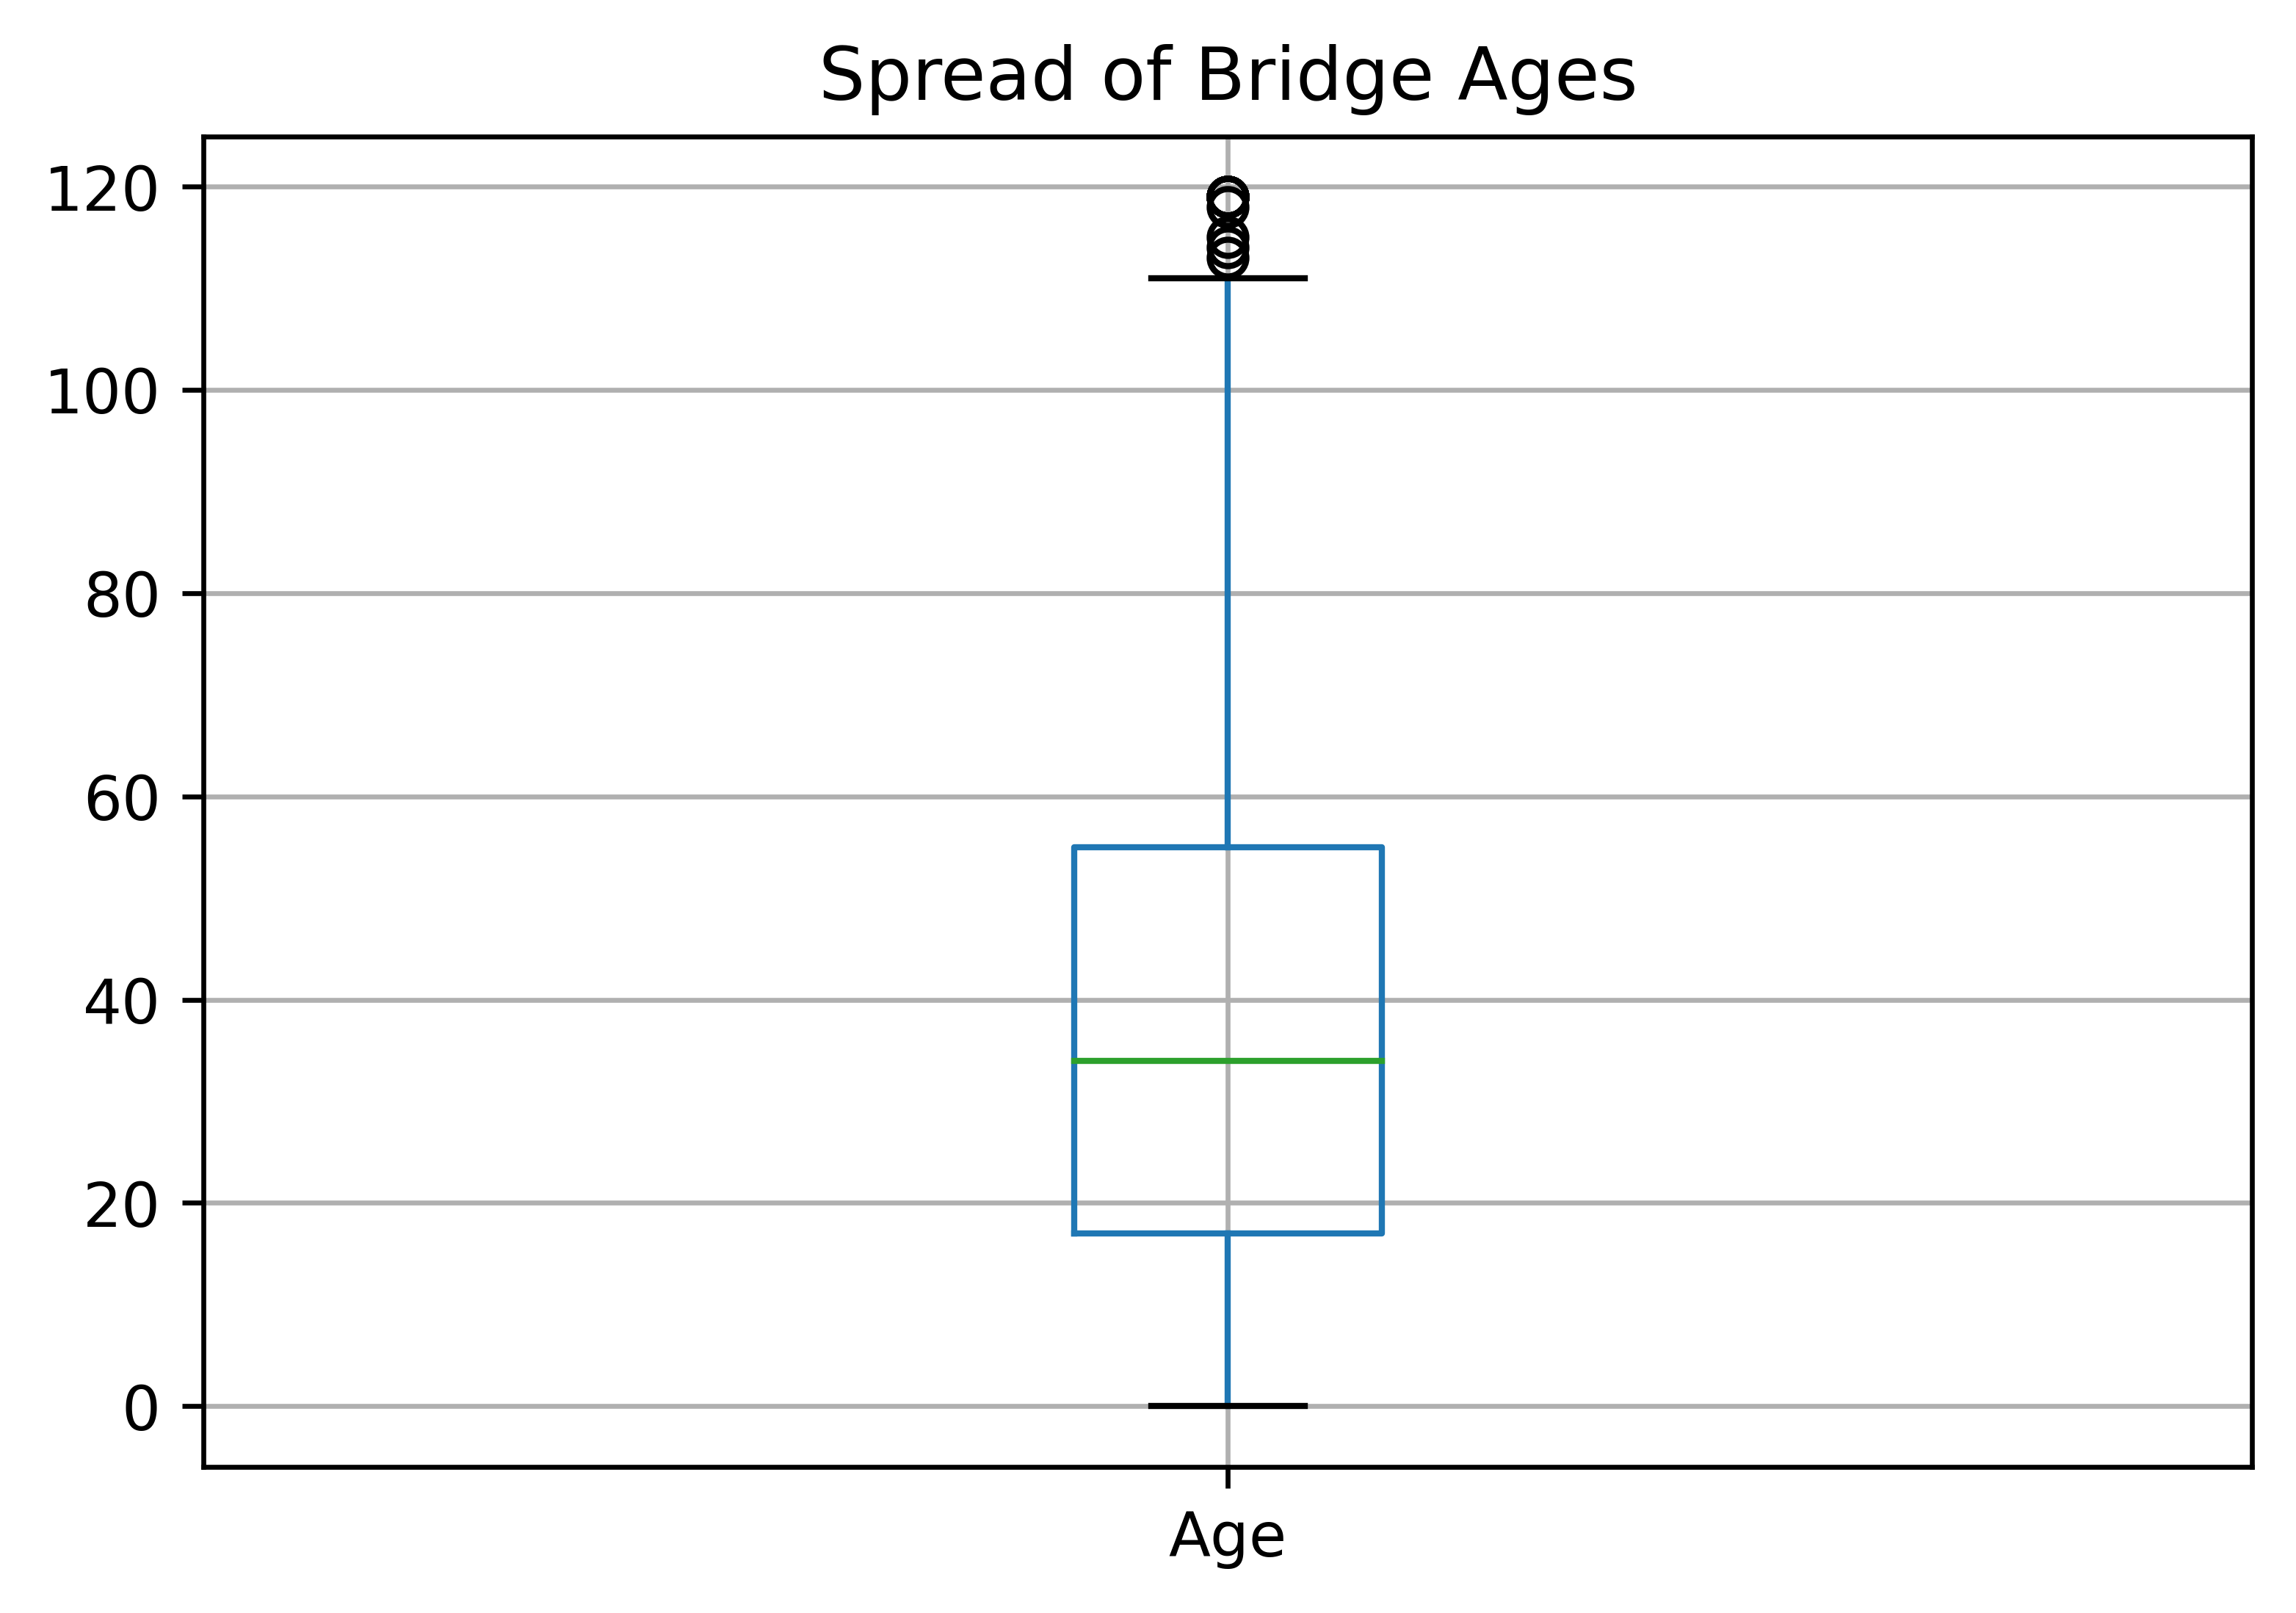

In [3]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
print("Figure 1: Boxplot of spread of ages")
figure(dpi=600)

bridges_age.boxplot(column='Age')
plt.title("Spread of Bridge Ages")

In [4]:
Q3 = bridges_age.loc[:, "Age"].quantile(0.75)
Q1 = bridges_age.loc[:, "Age"].quantile(0.25)
IQR = Q3 - Q1
too_old = Q3 + 1.5 * IQR
too_old

def is_old(row):
    if row.loc["Age"] > too_old:
        return "Historic"
    else:
        return "No"

not_old = bridges_age.assign(Historic = bridges_age.apply(is_old, axis=1))

bridges_a = not_old.loc[(not_old.Historic == 'No')]
bridges_b = bridges_a.loc[:, ["Age", "AverageDaily", "Trucks_percent", "Material", "Design", 
                              "Deck_rating", "Superstr_rating", "Substr_rating"]]
print("Table 4: Dataframe with historic bridges removed, including only factors of interest")
bridges_b

Table 4: Dataframe with historic bridges removed, including only factors of interest


,Age,AverageDaily,Trucks_percent,Material,Design,Deck_rating,Superstr_rating,Substr_rating
0,14,1,0.0,Concrete,Slab,Good,Very Good,Very Good
1,14,1,0.0,Concrete,Slab,Good,Good,Very Good
2,7,100,0.0,Concrete,Beam,Very Good,Very Good,Very Good
3,69,80,0.0,Timber,Beam,Good,Good,Poor
4,15,150,4.0,Concrete,Beam,Good,Very Good,Very Good
...,...,...,...,...,...,...,...,...
34288,25,300,40.0,Concrete,Beam,Good,Good,Good
34289,19,300,40.0,Concrete,Beam,Good,Good,Good
34290,23,1200,25.0,Concrete,Beam,Good,Good,Good
34291,28,300,15.0,Concrete,Beam,Good,Good,Satisfactory


### 2. D. Merging small categories
I have merged small categories for ease of analysis because their effect will be negligble in their current categorisation.
First I will combine timber, masonry and other.

In [5]:
a = bridges_b.groupby(by = 'Material')
print("Table 5: Counts of bridges made of each material")
a.size()

Table 5: Counts of bridges made of each material


Material
Concrete    27126
Masonry        13
Other          48
Steel        6625
Timber        465
dtype: int64

In [6]:
simp_material_type = pd.CategoricalDtype(categories=['Miscellaneous', 'Concrete', 'Steel', 
                                                  ], ordered=False)

material_d = {'Masonry':'Miscellaneous', 'Timber':'Miscellaneous', 'Other':'Miscellaneous'}

def simp_mat(row):
    if row.Material in material_d:
        return material_d[row.Material]
    return row.Material

bridges_c = bridges_b.assign(Material = bridges_b.apply(simp_mat, axis=1))
bridges_c = bridges_c.astype({'Material':simp_material_type})
print("Table 6: Dataframe with small category materials combined to 'Miscellaneous'")
bridges_c

Table 6: Dataframe with small category materials combined to 'Miscellaneous'


,Age,AverageDaily,Trucks_percent,Material,Design,Deck_rating,Superstr_rating,Substr_rating
0,14,1,0.0,Concrete,Slab,Good,Very Good,Very Good
1,14,1,0.0,Concrete,Slab,Good,Good,Very Good
2,7,100,0.0,Concrete,Beam,Very Good,Very Good,Very Good
3,69,80,0.0,Miscellaneous,Beam,Good,Good,Poor
4,15,150,4.0,Concrete,Beam,Good,Very Good,Very Good
...,...,...,...,...,...,...,...,...
34288,25,300,40.0,Concrete,Beam,Good,Good,Good
34289,19,300,40.0,Concrete,Beam,Good,Good,Good
34290,23,1200,25.0,Concrete,Beam,Good,Good,Good
34291,28,300,15.0,Concrete,Beam,Good,Good,Satisfactory


Secondly I will combine designs of arch, frame, movable, suspension and truss with other.

In [7]:
b = bridges_c.groupby(by = 'Design')
print("Table 7: Counts of bridge design types")
b.size()

Table 7: Counts of bridge design types


Design
Arch            159
Beam          28324
Frame            68
Movable          13
Other          1244
Slab           4339
Suspension        5
Truss           125
dtype: int64

In [8]:
simp_design_type = pd.CategoricalDtype(categories=['Slab', 'Miscellaneous', 'Beam'], ordered=True)

des_d = {'Arch':'Miscellaneous', 'Frame':'Miscellaneous', 'Movable':'Miscellaneous',
         'Suspension':'Miscellaneous', 'Truss':'Miscellaneous', 'Other':'Miscellaneous'}

def simp_des(row):
    if row.Design in des_d:
        return des_d[row.Design]
    return row.Design

bridges_d = bridges_c.assign(Design = bridges_c.apply(simp_des, axis=1))
bridges_d = bridges_d.astype({'Design':simp_design_type})
print("Table 8: Dataframe with small category designs combined to 'Miscellaneous'")
bridges_d

Table 8: Dataframe with small category designs combined to 'Miscellaneous'


,Age,AverageDaily,Trucks_percent,Material,Design,Deck_rating,Superstr_rating,Substr_rating
0,14,1,0.0,Concrete,Slab,Good,Very Good,Very Good
1,14,1,0.0,Concrete,Slab,Good,Good,Very Good
2,7,100,0.0,Concrete,Beam,Very Good,Very Good,Very Good
3,69,80,0.0,Miscellaneous,Beam,Good,Good,Poor
4,15,150,4.0,Concrete,Beam,Good,Very Good,Very Good
...,...,...,...,...,...,...,...,...
34288,25,300,40.0,Concrete,Beam,Good,Good,Good
34289,19,300,40.0,Concrete,Beam,Good,Good,Good
34290,23,1200,25.0,Concrete,Beam,Good,Good,Good
34291,28,300,15.0,Concrete,Beam,Good,Good,Satisfactory


### 2. E. Converting Ratings into Scores
Ratings of the bridges were given in word form (see below). To be able to easily understand a relationship, I must convert the deck, superstructure and substructure ratings to numbers and combine them; higher scores imply better condition (Failed = 0, Excellent = 9). 

I will also remove rows with missing values as combining these will give low scores (which is not representative).

In [9]:
print("The different ratings of bridge condition:")
str(bridges_d.Deck_rating.unique())

The different ratings of bridge condition:


"['Good' 'Very Good' 'Fair' 'Satisfactory' 'Excellent' 'Failed' 'Poor' nan\n 'Failing' 'Serious' 'Critical']"

Table 9 shows the missing values in the ratings columns.

In [10]:
print("Table 9: Missing Ratings")
bridges_d.loc[(bridges_d.Deck_rating.isnull()) | (bridges_d.Superstr_rating.isnull()) | 
              (bridges_d.Substr_rating.isnull())]

Table 9: Missing Ratings


,Age,AverageDaily,Trucks_percent,Material,Design,Deck_rating,Superstr_rating,Substr_rating
367,49,7520,2.0,Concrete,Beam,NaN,Good,Good
1874,73,340,0.0,Steel,Beam,Good,NaN,Fair
4668,11,20,0.0,Concrete,Miscellaneous,NaN,Very Good,Very Good
15698,11,100,0.0,Concrete,Miscellaneous,NaN,Good,Good
18018,20,60,0.0,Steel,Miscellaneous,NaN,Very Good,Good
29605,28,160,16.0,Concrete,Miscellaneous,NaN,Good,Good
31765,59,50,0.0,Concrete,Miscellaneous,Failing,NaN,Poor


In [11]:
bridges_d = bridges_d.dropna()

### 2. F. Cleaned Data Ready for Analysis

In [12]:
score_conv = {'Failed':0, 'Failing':1, 'Critical':2, 'Serious':3, 'Poor':4, 'Fair':5,
              'Satisfactory':6, 'Good':7, 'Very Good':8, 'Excellent':9}

def deck_to_score(row):
    if row.Deck_rating in score_conv:
        return score_conv[row.Deck_rating]
    return row.Deck_rating

def super_to_score(row):
    if row.Superstr_rating in score_conv:
        return score_conv[row.Superstr_rating]
    return row.Superstr_rating

def sub_to_score(row):
    if row.Substr_rating in score_conv:
        return score_conv[row.Substr_rating]
    return row.Substr_rating

bridges_e = bridges_d.assign(Deck_score = bridges_d.apply(deck_to_score, axis=1), 
                             Superstr_score = bridges_d.apply(super_to_score, axis=1),
                             Substr_score = bridges_d.apply(sub_to_score, axis=1))
print("Table 9.5: Rating converted to score")
bridges_e

Table 9.5: Rating converted to score


,Age,AverageDaily,Trucks_percent,Material,Design,Deck_rating,Superstr_rating,Substr_rating,Deck_score,Superstr_score,Substr_score
0,14,1,0.0,Concrete,Slab,Good,Very Good,Very Good,7,8,8
1,14,1,0.0,Concrete,Slab,Good,Good,Very Good,7,7,8
2,7,100,0.0,Concrete,Beam,Very Good,Very Good,Very Good,8,8,8
3,69,80,0.0,Miscellaneous,Beam,Good,Good,Poor,7,7,4
4,15,150,4.0,Concrete,Beam,Good,Very Good,Very Good,7,8,8
...,...,...,...,...,...,...,...,...,...,...,...
34288,25,300,40.0,Concrete,Beam,Good,Good,Good,7,7,7
34289,19,300,40.0,Concrete,Beam,Good,Good,Good,7,7,7
34290,23,1200,25.0,Concrete,Beam,Good,Good,Good,7,7,7
34291,28,300,15.0,Concrete,Beam,Good,Good,Satisfactory,7,7,6


In [13]:
def calc_total(row):
    return row.loc['Deck_score'] + row.loc['Superstr_score'] + row.loc['Substr_score']

bridges_f = bridges_e.assign(Condition_score = bridges_e.apply(calc_total, axis=1))

analysis = bridges_f.loc[:, ["Age", "AverageDaily", "Trucks_percent", 
                             "Material", "Design", "Condition_score"]]
print("Table 10: Final 'clean' data from which to infer relationships:")
analysis

Table 10: Final 'clean' data from which to infer relationships:


,Age,AverageDaily,Trucks_percent,Material,Design,Condition_score
0,14,1,0.0,Concrete,Slab,23
1,14,1,0.0,Concrete,Slab,22
2,7,100,0.0,Concrete,Beam,24
3,69,80,0.0,Miscellaneous,Beam,18
4,15,150,4.0,Concrete,Beam,23
...,...,...,...,...,...,...
34288,25,300,40.0,Concrete,Beam,21
34289,19,300,40.0,Concrete,Beam,21
34290,23,1200,25.0,Concrete,Beam,21
34291,28,300,15.0,Concrete,Beam,20


## 3. Exploratory Analysis
### 3. A. Correlations Heatmap
Figure 2 shows the correlation of the different numerical variables, the darker the colour, the more correlated the variable pair. The most significant is condition score with age. The value of -0.59 suggests that when age increases, the condition score decreases.

Other variable correlations are close to 0 which implies there is not much relationship between them.

Figure 2: Correlation Heatmap between Numerical Variables


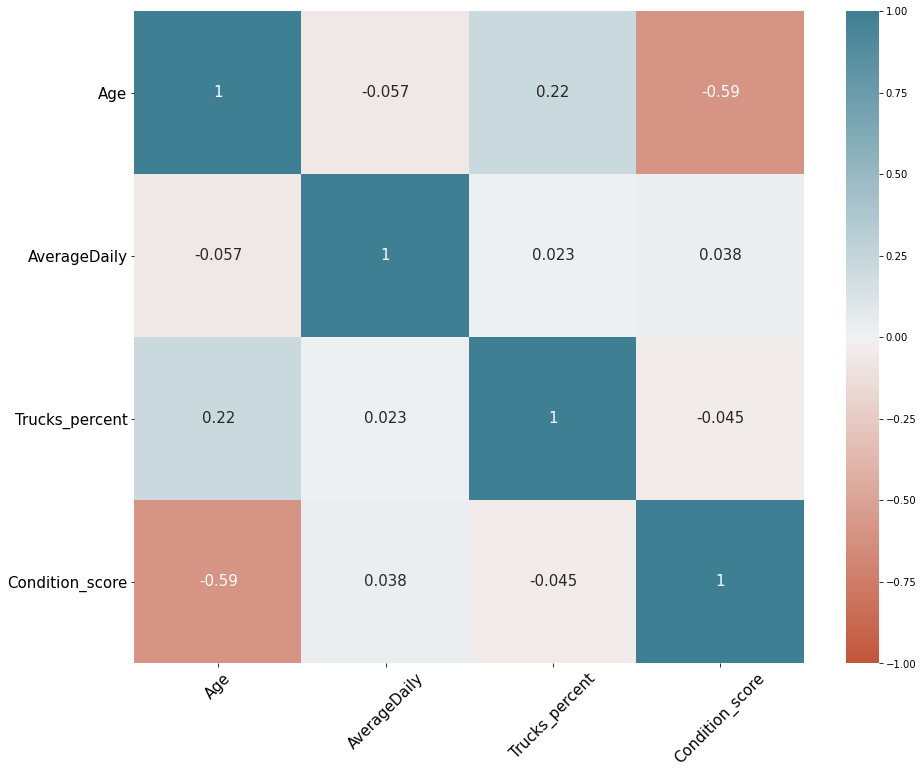

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

print("Figure 2: Correlation Heatmap between Numerical Variables")
fig,ax = plt.subplots(1,1, figsize=(15,12))
sns.heatmap(analysis.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), 
            annot=True, ax=ax, annot_kws={"size": 15})
_y = plt.yticks(rotation=0, fontsize=15)
_x = plt.xticks(rotation=45, fontsize=15)

### 3. B. Bridge Type with Spread of their Condition
Figure 3 shows the spread of the condition score between each type of Design or Material.
The space between the whiskers outline where most of the data is. The middle box shows where the data surrounding the middle is. The top chart marginally shows that the Slab design bridge has a lower condition score than the other bridges. The second figure shows that most of the concrete bridges have higher score than the other materials.
Nonetheless, all categories have only few bridges with scores less than 10, which are far from the rest of the data.

Figure 3: Boxplots showing the spread of bridge condition across different categories of bridges (higher is better)


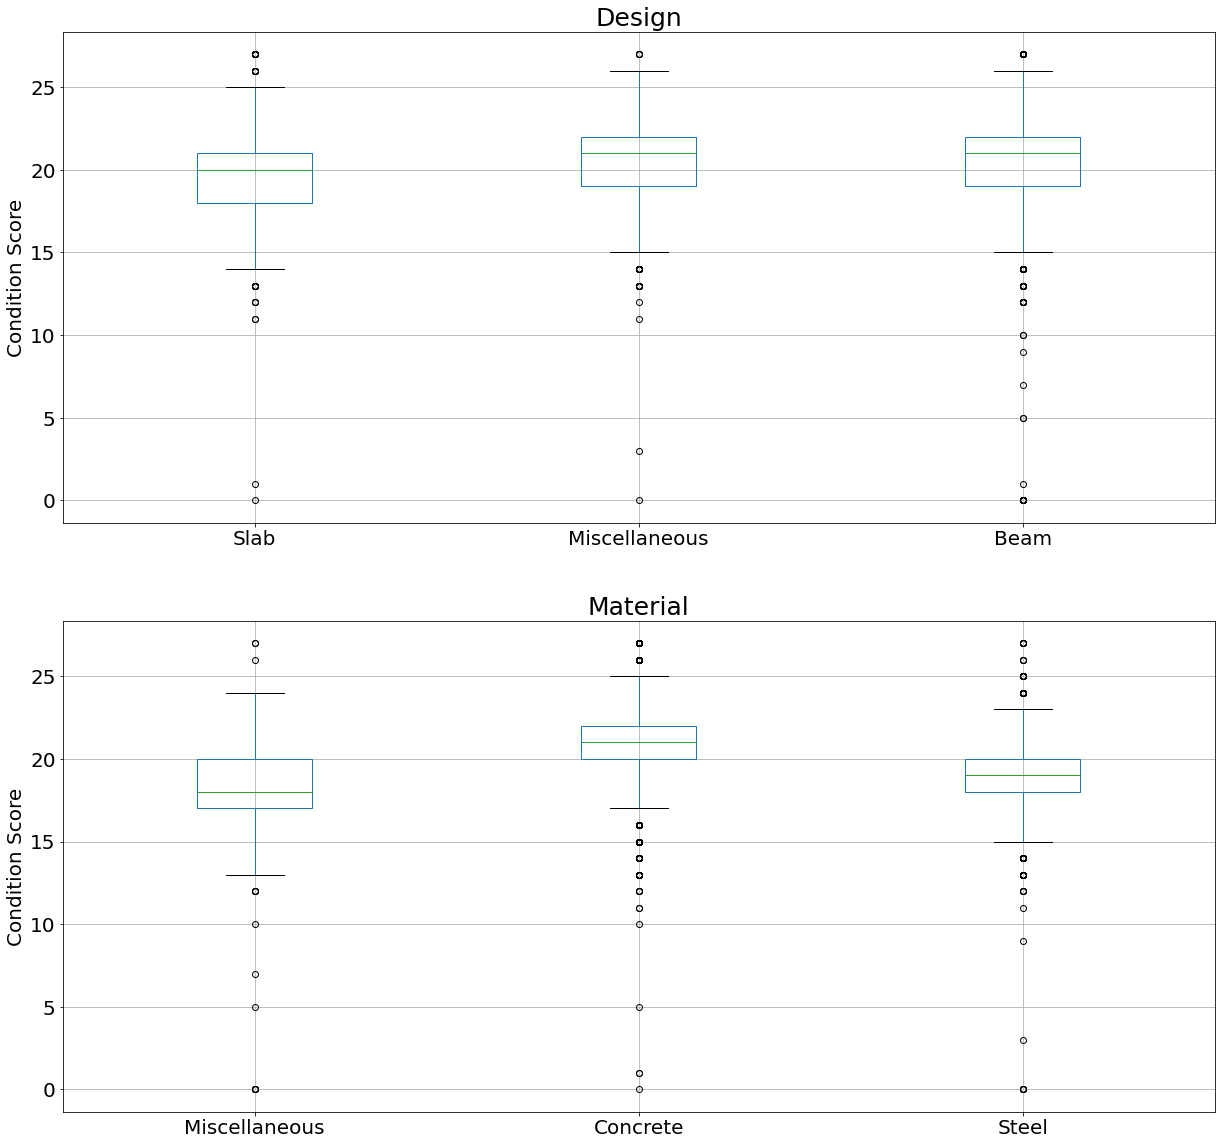

In [15]:
font = 20

print("Figure 3: Boxplots showing the spread of bridge condition across different categories of bridges (higher is better)")
fig, (a1, a2) = plt.subplots(2,1, figsize=(20,20))
analysis.boxplot(column='Condition_score', by='Design', ax=a1)
analysis.boxplot(column='Condition_score', by='Material', ax=a2)

fig.suptitle('')
[a.set_xlabel('') for a in [a1, a2]]
a1.set_ylabel('Condition Score', fontsize=font)
a1.set_title('Design', fontsize=font + 5)
a1.tick_params(axis='x', labelsize=font)
a1.tick_params(axis='y', labelsize=font)
a2.set_ylabel('Condition Score', fontsize=font)
a2.set_title('Material', fontsize=font + 5)
a2.tick_params(axis='x', labelsize=font)
a2.tick_params(axis='y', labelsize=font)

Further analysis, with the histograms below, of the Design and Material spread shows that all the different categories have similar proportions of their total bridges with similar scores (like in the boxplot above). Marginal differences are shown compared to different categories: such as 'Slab' having a high proportion of bridges just below 20 and 'Concrete' having a higher proportion of bridges in the 20-25 range.

Figure 4: Histograms showing the spread of bridge condition across different categories of bridges


Text(0.5, 0, 'Condition Score')

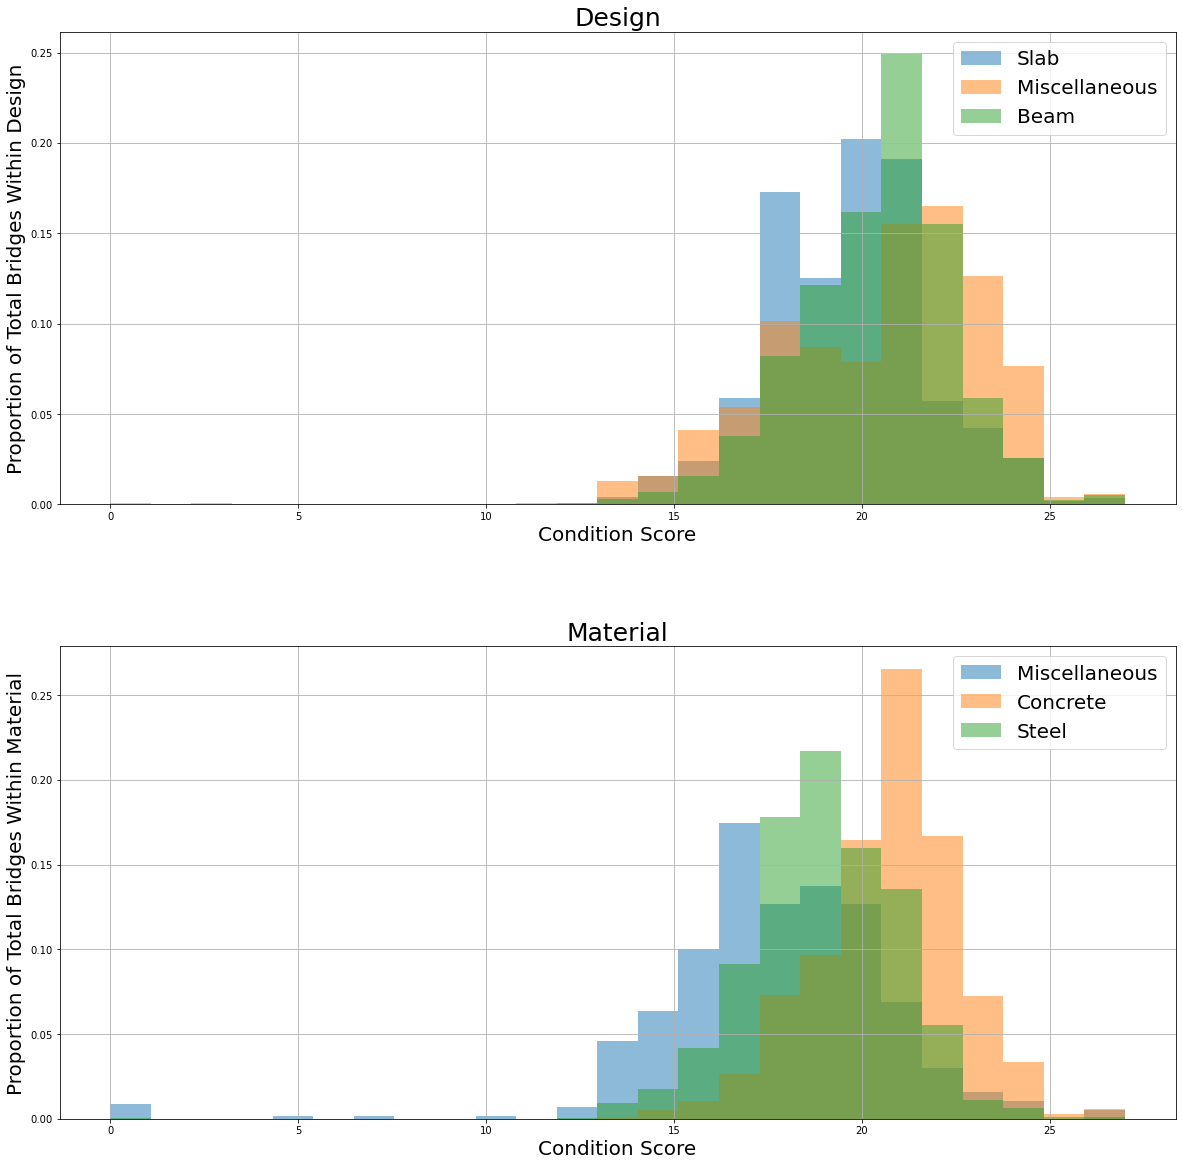

In [16]:
analysis_mat = analysis.groupby(by = 'Design')
analysis_des = analysis.groupby(by = 'Material')

print("Figure 4: Histograms showing the spread of bridge condition across different categories of bridges")
fig, (a1, a2) = plt.subplots(2,1, figsize=(20,20))

analysis_mat.hist(column='Condition_score', alpha=0.5, bins=25, density=True, ax=a1)
analysis_des.hist(column='Condition_score', alpha=0.5, bins=25, density=True, ax=a2)

names1 = ['Slab', 'Miscellaneous', 'Beam']
names2 = ['Miscellaneous', 'Concrete', 'Steel']
a1.legend(names1, fontsize=font)
a2.legend(names2, fontsize=font)

a1.set_title('Design', fontsize=font + 5)
a1.set_ylabel('Proportion of Total Bridges Within Design', fontsize=font)
a1.set_xlabel('Condition Score', fontsize=font)
a2.set_title('Material', fontsize=font + 5)
a2.set_ylabel('Proportion of Total Bridges Within Material', fontsize=font)
a2.set_xlabel('Condition Score', fontsize=font)

### 3. C. Bridge Type with Spread of Daily Average Traffic
Figure 5 the spread of the daily average traffic between the different categories. The Beam Design category is the most spread and has the a highest proportion of bridges with highest daily traffic. The Miscellaneous Material category has the lowest spread with the lowest daily traffic out of all categories, with no bridge in this category possessing average traffic of more than 5000.

The values are displayed logarithmically, therefore these differences are very small. Most of the porportion of all the categories are below 10,000 vehicles.

Figure 5: Histograms showing the spread of daily average traffic across different categories of bridges


Text(0.5, 0, 'Average Daily Traffic')

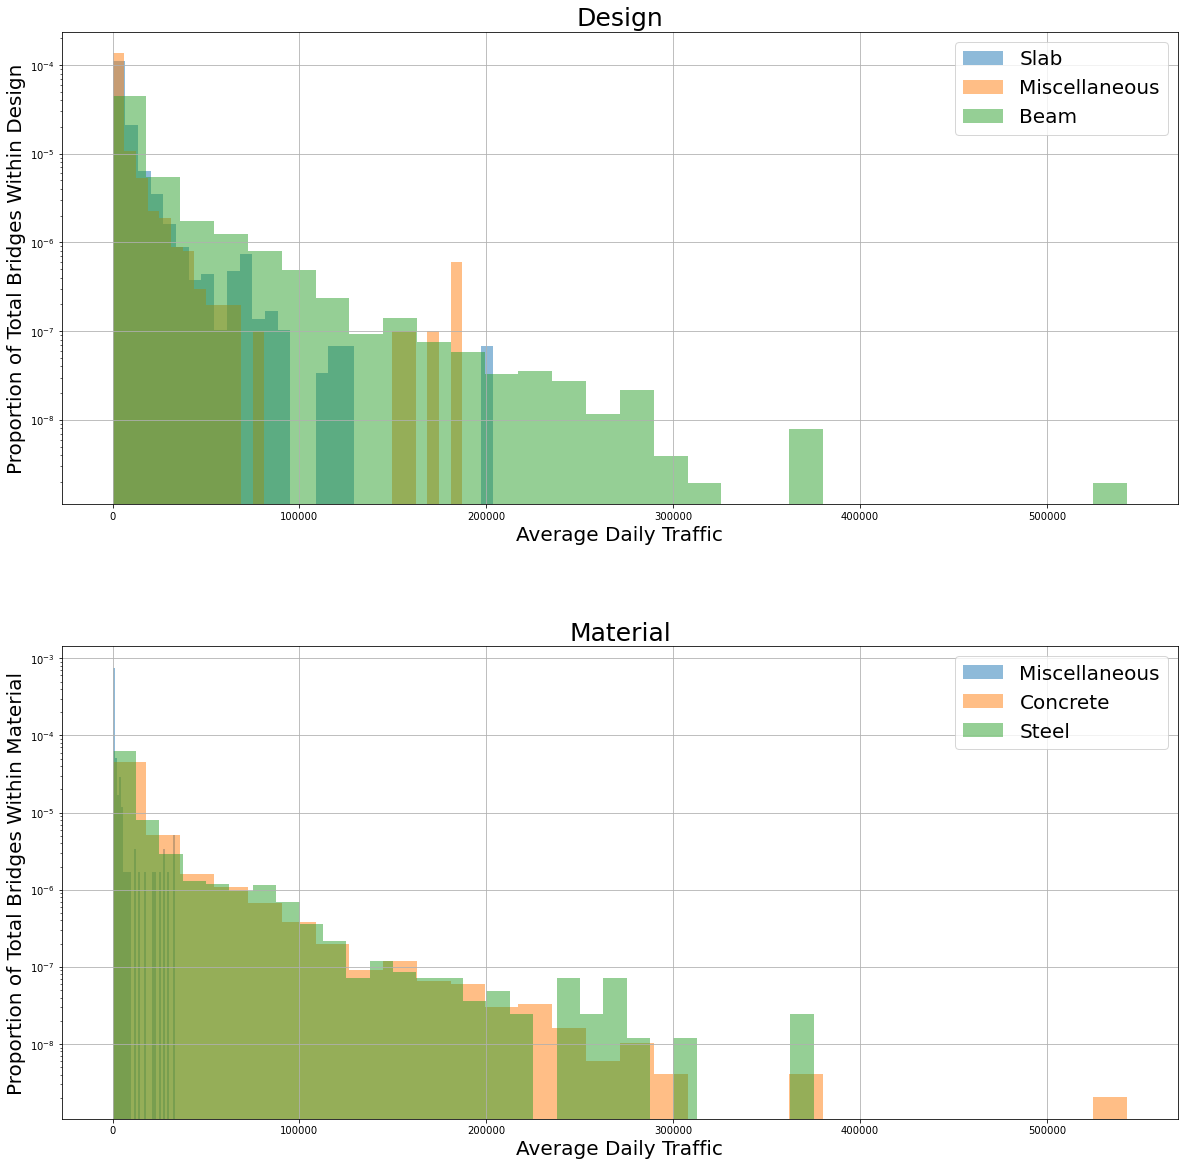

In [17]:
print("Figure 5: Histograms showing the spread of daily average traffic across different categories of bridges")
fig, (a1, a2) = plt.subplots(2,1, figsize=(20,20))

analysis_mat.hist(column='AverageDaily', alpha=0.5, bins=30, density=True, log=True, ax=a1)
analysis_des.hist(column='AverageDaily', alpha=0.5, bins=30, density=True, log=True, ax=a2)

names1 = ['Slab', 'Miscellaneous', 'Beam']
names2 = ['Miscellaneous', 'Concrete', 'Steel']
a1.legend(names1, fontsize=font)
a2.legend(names2, fontsize=font)

a1.set_title('Design', fontsize=font + 5)
a1.set_ylabel('Proportion of Total Bridges Within Design', fontsize=font)
a1.set_xlabel('Average Daily Traffic', fontsize=font)
a2.set_title('Material', fontsize=font + 5)
a2.set_ylabel('Proportion of Total Bridges Within Material', fontsize=font)
a2.set_xlabel('Average Daily Traffic', fontsize=font)

### 3. D. Bridge Type with Spread of Percentage Trucks
All the design categories have a similar spread of truck traffic percentage. The Miscellaneous Material category has the lowest percentage of truck traffic compared to other categories.

Figure 6: Histograms showing the spread of percentage traffic that are trucks across different categories of bridges


Text(0.5, 0, 'Truck Traffic (%)')

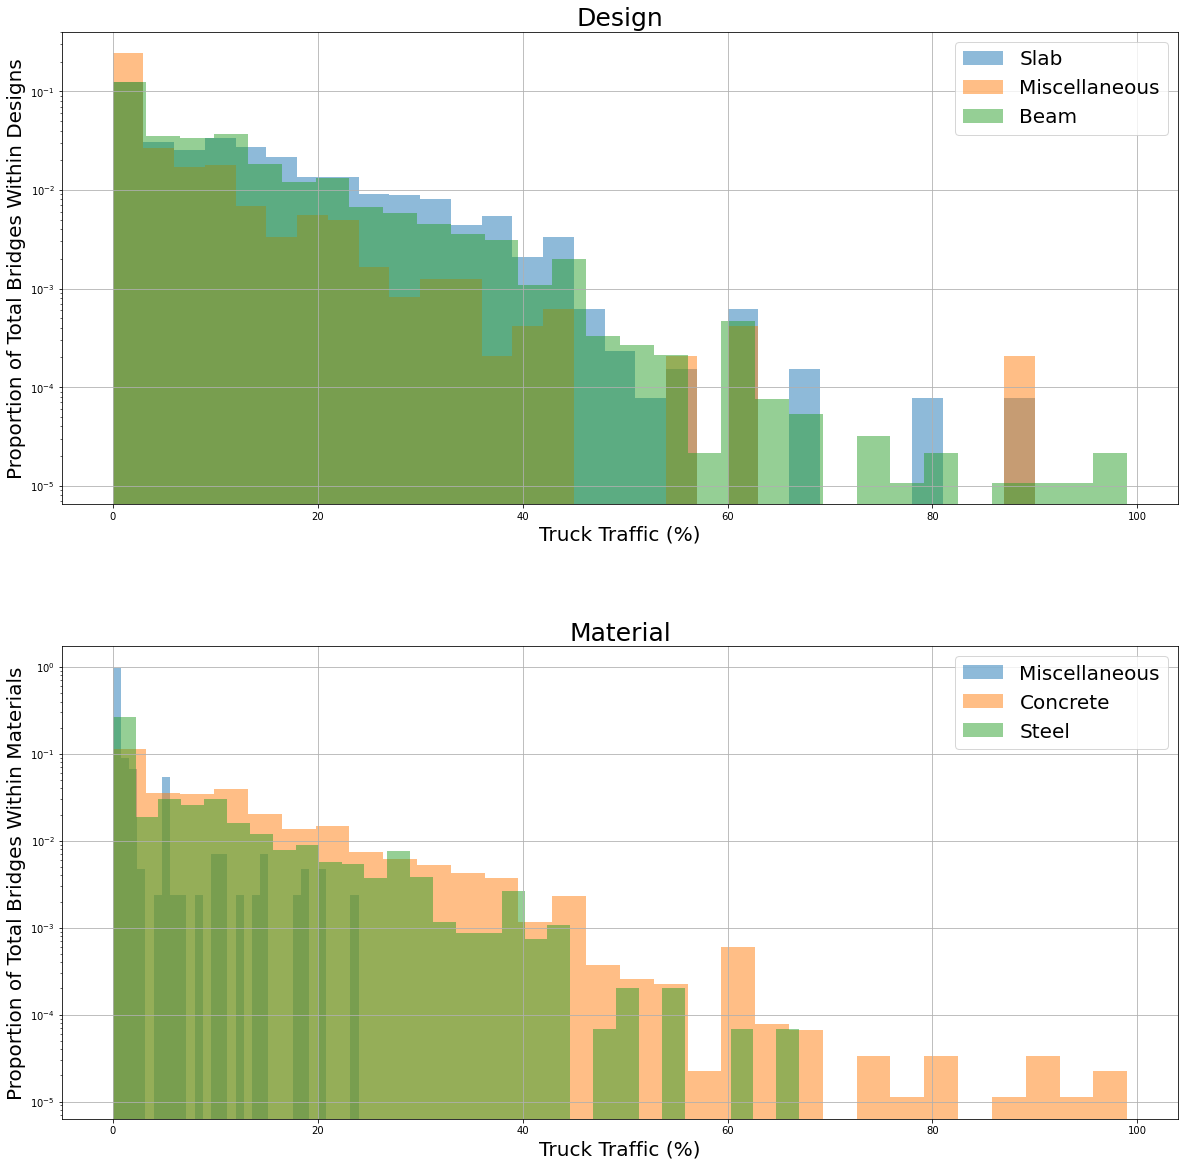

In [18]:
print("Figure 6: Histograms showing the spread of percentage traffic that are trucks across different categories of bridges")
fig, (a1, a2) = plt.subplots(2,1, figsize=(20,20))

analysis_mat.hist(column='Trucks_percent', alpha=0.5, bins=30, density=True, log=True, ax=a1)
analysis_des.hist(column='Trucks_percent', alpha=0.5, bins=30, density=True, log=True, ax=a2)

names1 = ['Slab', 'Miscellaneous', 'Beam']
names2 = ['Miscellaneous', 'Concrete', 'Steel']
a1.legend(names1, fontsize=font)
a2.legend(names2, fontsize=font)

a1.set_title('Design', fontsize=font + 5)
a1.set_ylabel('Proportion of Total Bridges Within Designs', fontsize=font)
a1.set_xlabel('Truck Traffic (%)', fontsize=font)
a2.set_title('Material', fontsize=font + 5)
a2.set_ylabel('Proportion of Total Bridges Within Materials', fontsize=font)
a2.set_xlabel('Truck Traffic (%)', fontsize=font)

### 3. E. Bridge Type with Spread of Ages
Figure 7 shows that the spread of ages between different bridge categories is mostly the same, with 75% of all bridges being less than 60 years old, apart from slab bridges which are evenly spread over 110 years.

Figure 7: Boxplots showing the spread of ages across different categories


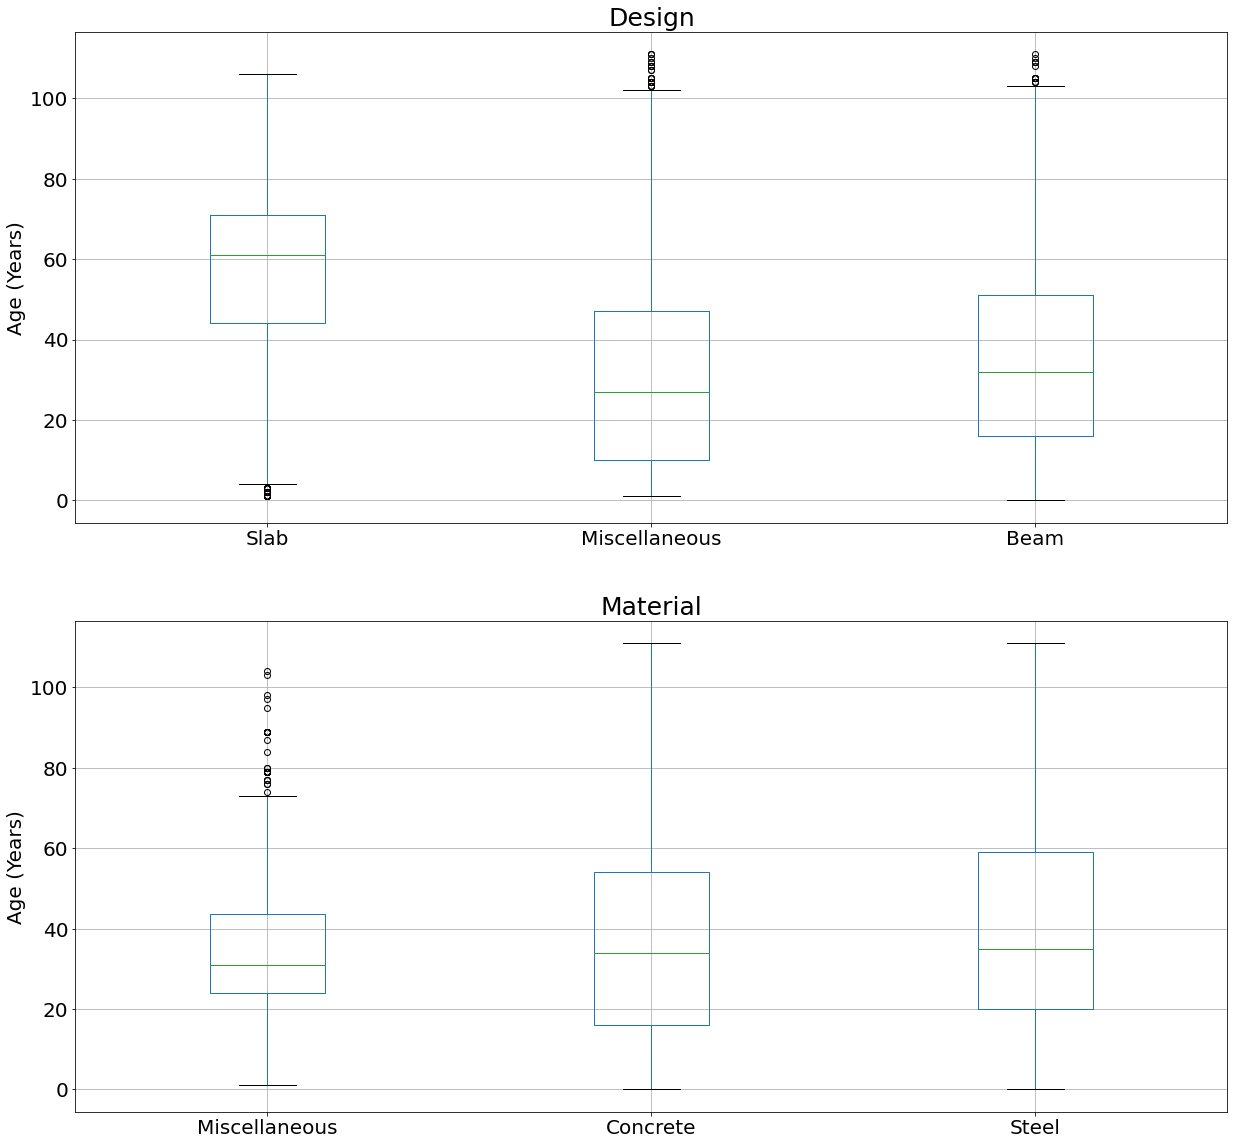

In [19]:
print("Figure 7: Boxplots showing the spread of ages across different categories")
fig, (a1, a2) = plt.subplots(2,1, figsize=(20,20))
analysis.boxplot(column='Age', by='Design', ax=a1)
analysis.boxplot(column='Age', by='Material', ax=a2)

fig.suptitle('')
[a.set_xlabel('') for a in [a1, a2]]
a1.set_ylabel('Age (Years)', fontsize=font)
a1.set_title('Design', fontsize=font + 5)
a1.tick_params(axis='x', labelsize=font)
a1.tick_params(axis='y', labelsize=font)
a2.set_ylabel('Age (Years)', fontsize=font)
a2.set_title('Material', fontsize=font + 5)
a2.tick_params(axis='x', labelsize=font)
a2.tick_params(axis='y', labelsize=font)

### 3. F. Relationship between Design and Material
#### 3. F. a. Material given Design
Figure 8 shows that given what the bridge design is, what percentage of the bridge designs are made by a specific material.

Across all bridge designs, only a small percentage are made from 'Miscellaneous' Materials. All Slab bridges are made from Concrete, and the majority of the remaining bridge categories are made from concrete with approximately one quarter made from Steel.

Figure 8: Conditional design probabilities heatmap


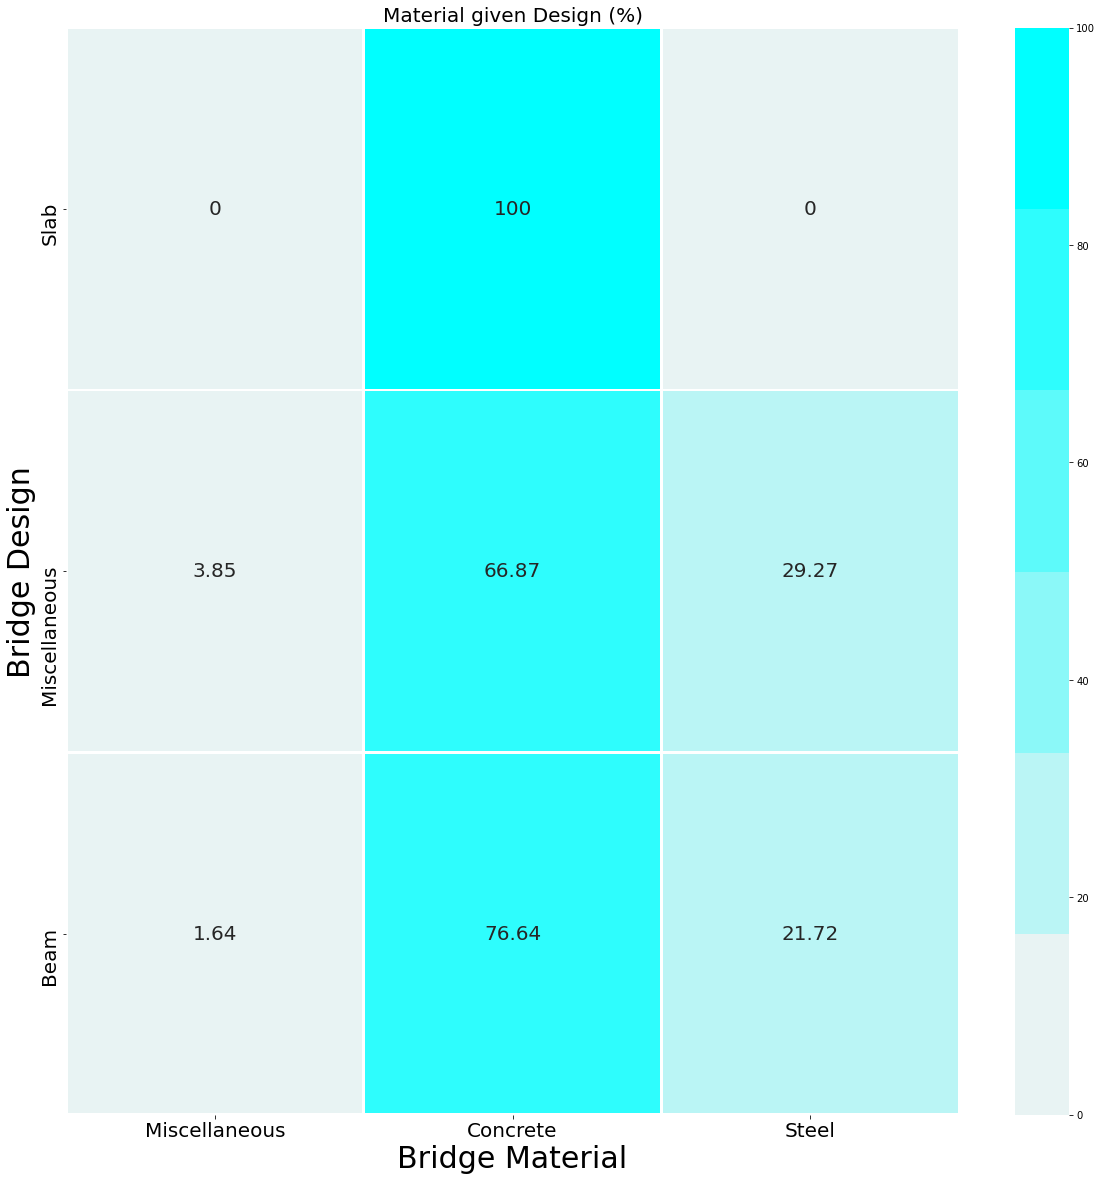

In [20]:
print("Figure 8: Conditional design probabilities heatmap")
mat_given_design = pd.crosstab(analysis.Design, [analysis.Material], normalize='index')

fig,ax = plt.subplots(1,1, figsize=(20,20))
sns.heatmap(mat_given_design.round(4)*100, cmap=sns.light_palette('#00ffff'), linewidths = 2,
            annot=True, ax=ax, annot_kws={"size": 20}, fmt='g')
ax.set_title('Material given Design (%)', fontsize=font)
ax.set_ylabel('Bridge Design', fontsize=font+10)
ax.set_xlabel('Bridge Material', fontsize=font+10)
ax.tick_params(axis='x', labelsize=font)
ax.tick_params(axis='y', labelsize=font)

#### 3. F. b. Design given Material
Figure 9 shows that given what the bridge is made from, what percentage of the material makes that specific bridge design. It shows that the majority of all materials make beam bridges and 16% of all concrete bridges are designed as Slab. Miscellaneous materials make the most of Miscellaneous design bridges.

Figure 9: Conditional material probability heatmap


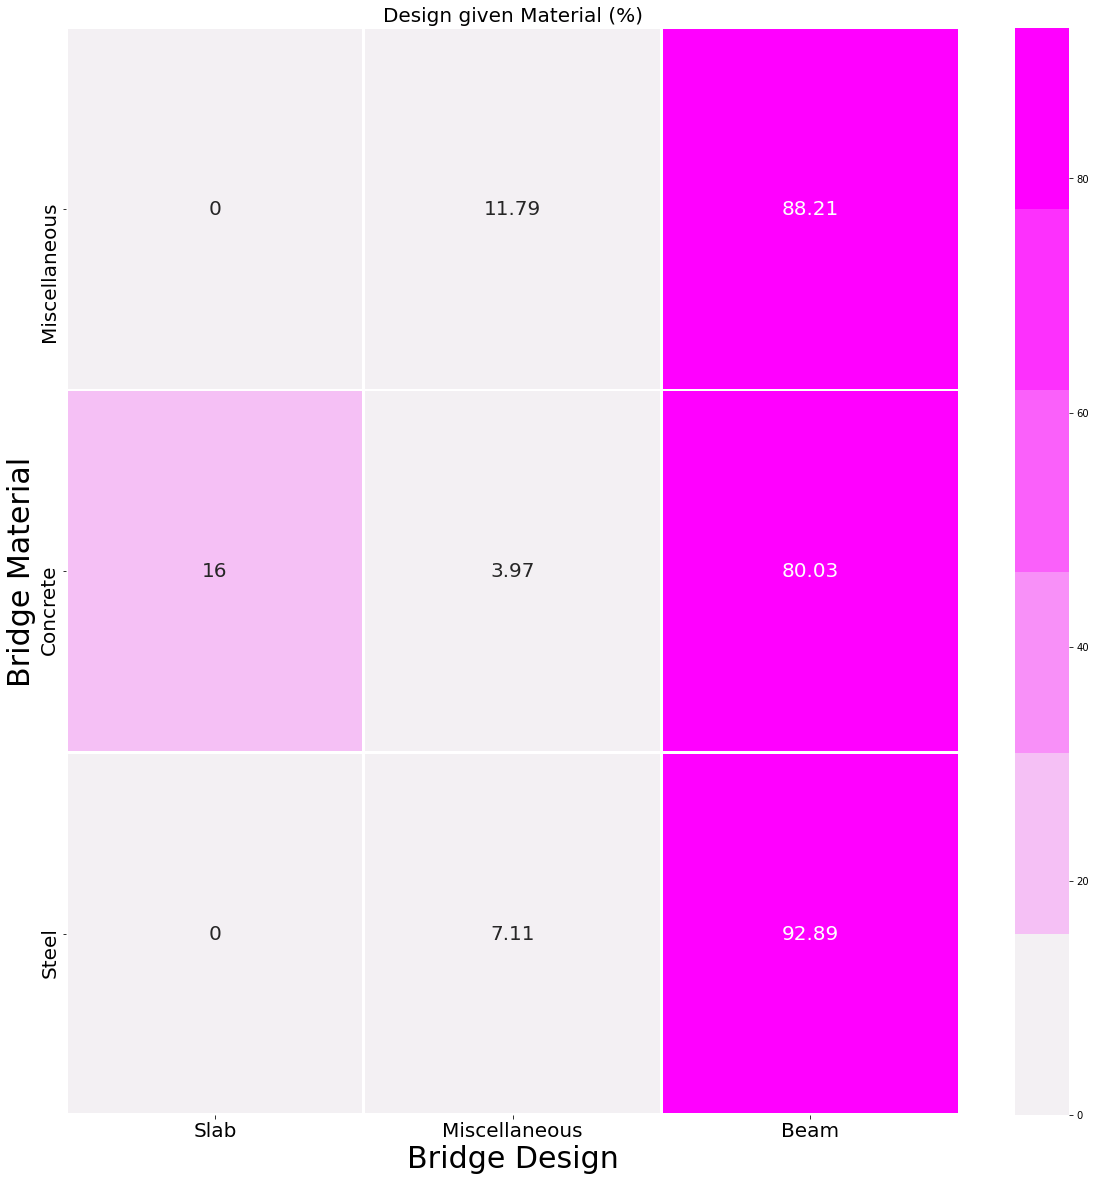

In [21]:
print("Figure 9: Conditional material probability heatmap")
des_given_mat = pd.crosstab(analysis.Material, [analysis.Design], normalize='index')

fig,ax = plt.subplots(1,1, figsize=(20,20))
sns.heatmap(des_given_mat.round(4)*100, cmap=sns.light_palette('#ff00ff'), linewidths = 2,
            annot=True, ax=ax, annot_kws={"size": 20}, fmt='g')
ax.set_title('Design given Material (%)', fontsize=font)
ax.set_xlabel('Bridge Design', fontsize=font+10)
ax.set_ylabel('Bridge Material', fontsize=font+10)
ax.tick_params(axis='x', labelsize=font)
ax.tick_params(axis='y', labelsize=font)

### 3. G. Summary of Exploratory analysis
* Older bridges are likely to be in worse condition.
* Concrete bridges are likely to be in better condition.
* Slab design bridges are marginally likely to be in worse condition.
* Average daily traffic and the percentage traffic that are trucks are mostly the same across designs and materials, apart from Miscellaneous materials which have low traffic values.
* 75% of bridges are 58 years old or less across all designs and materials, apart from slab bridges.
* Most bridges are made from concrete, with slab bridges being only made from concrete.

Note that slab bridges exclusively being made from concrete may be contradictory to the conclusion that concrete bridges are in better condition, as slab bridges are marginally in worse condition. But please bare in mind that only 16% of concrete bridges are slab designed, and this effect is only marginal, thus, concrete bridges are in overall better condition.

## 4. Regression Modelling
Regression enables us to explain how different factors affect the condition of bridges in a numerical and predictable form.
### 4. A. Checking distribution of the Condition Score
The regression will work better if the spread of the condition score values are symmetrical. Figure 10 shows good symmetry, thus, I can confidently continue with a regression model.

Figure 10: Condition Score distribution


Text(0.5, 0, 'Condition Score')

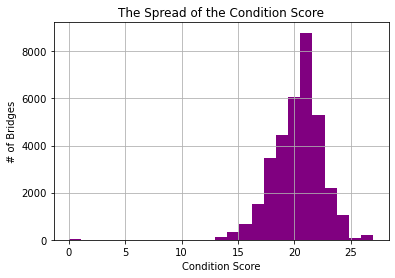

In [22]:
print("Figure 10: Condition Score distribution" )
analysis.hist(column='Condition_score', bins=25, color='purple')
plt.title('The Spread of the Condition Score')
plt.ylabel('# of Bridges')
plt.xlabel('Condition Score')

### 4. B. Visual look at the Numerical Factors
Figure 11 shows all the values of the numerical factors and how they affect the condition of the bridges. On first look, Age shows a slight trend, but average daily traffic and percentage truck traffic do not. As preliminarily discussed in the correlation heatmap earlier (Figure 2).

Figure 11: Numerical factors scattered against condition score


Text(0.5, 0, 'Truck Traffic (%)')

<Figure size 3600x2400 with 0 Axes>

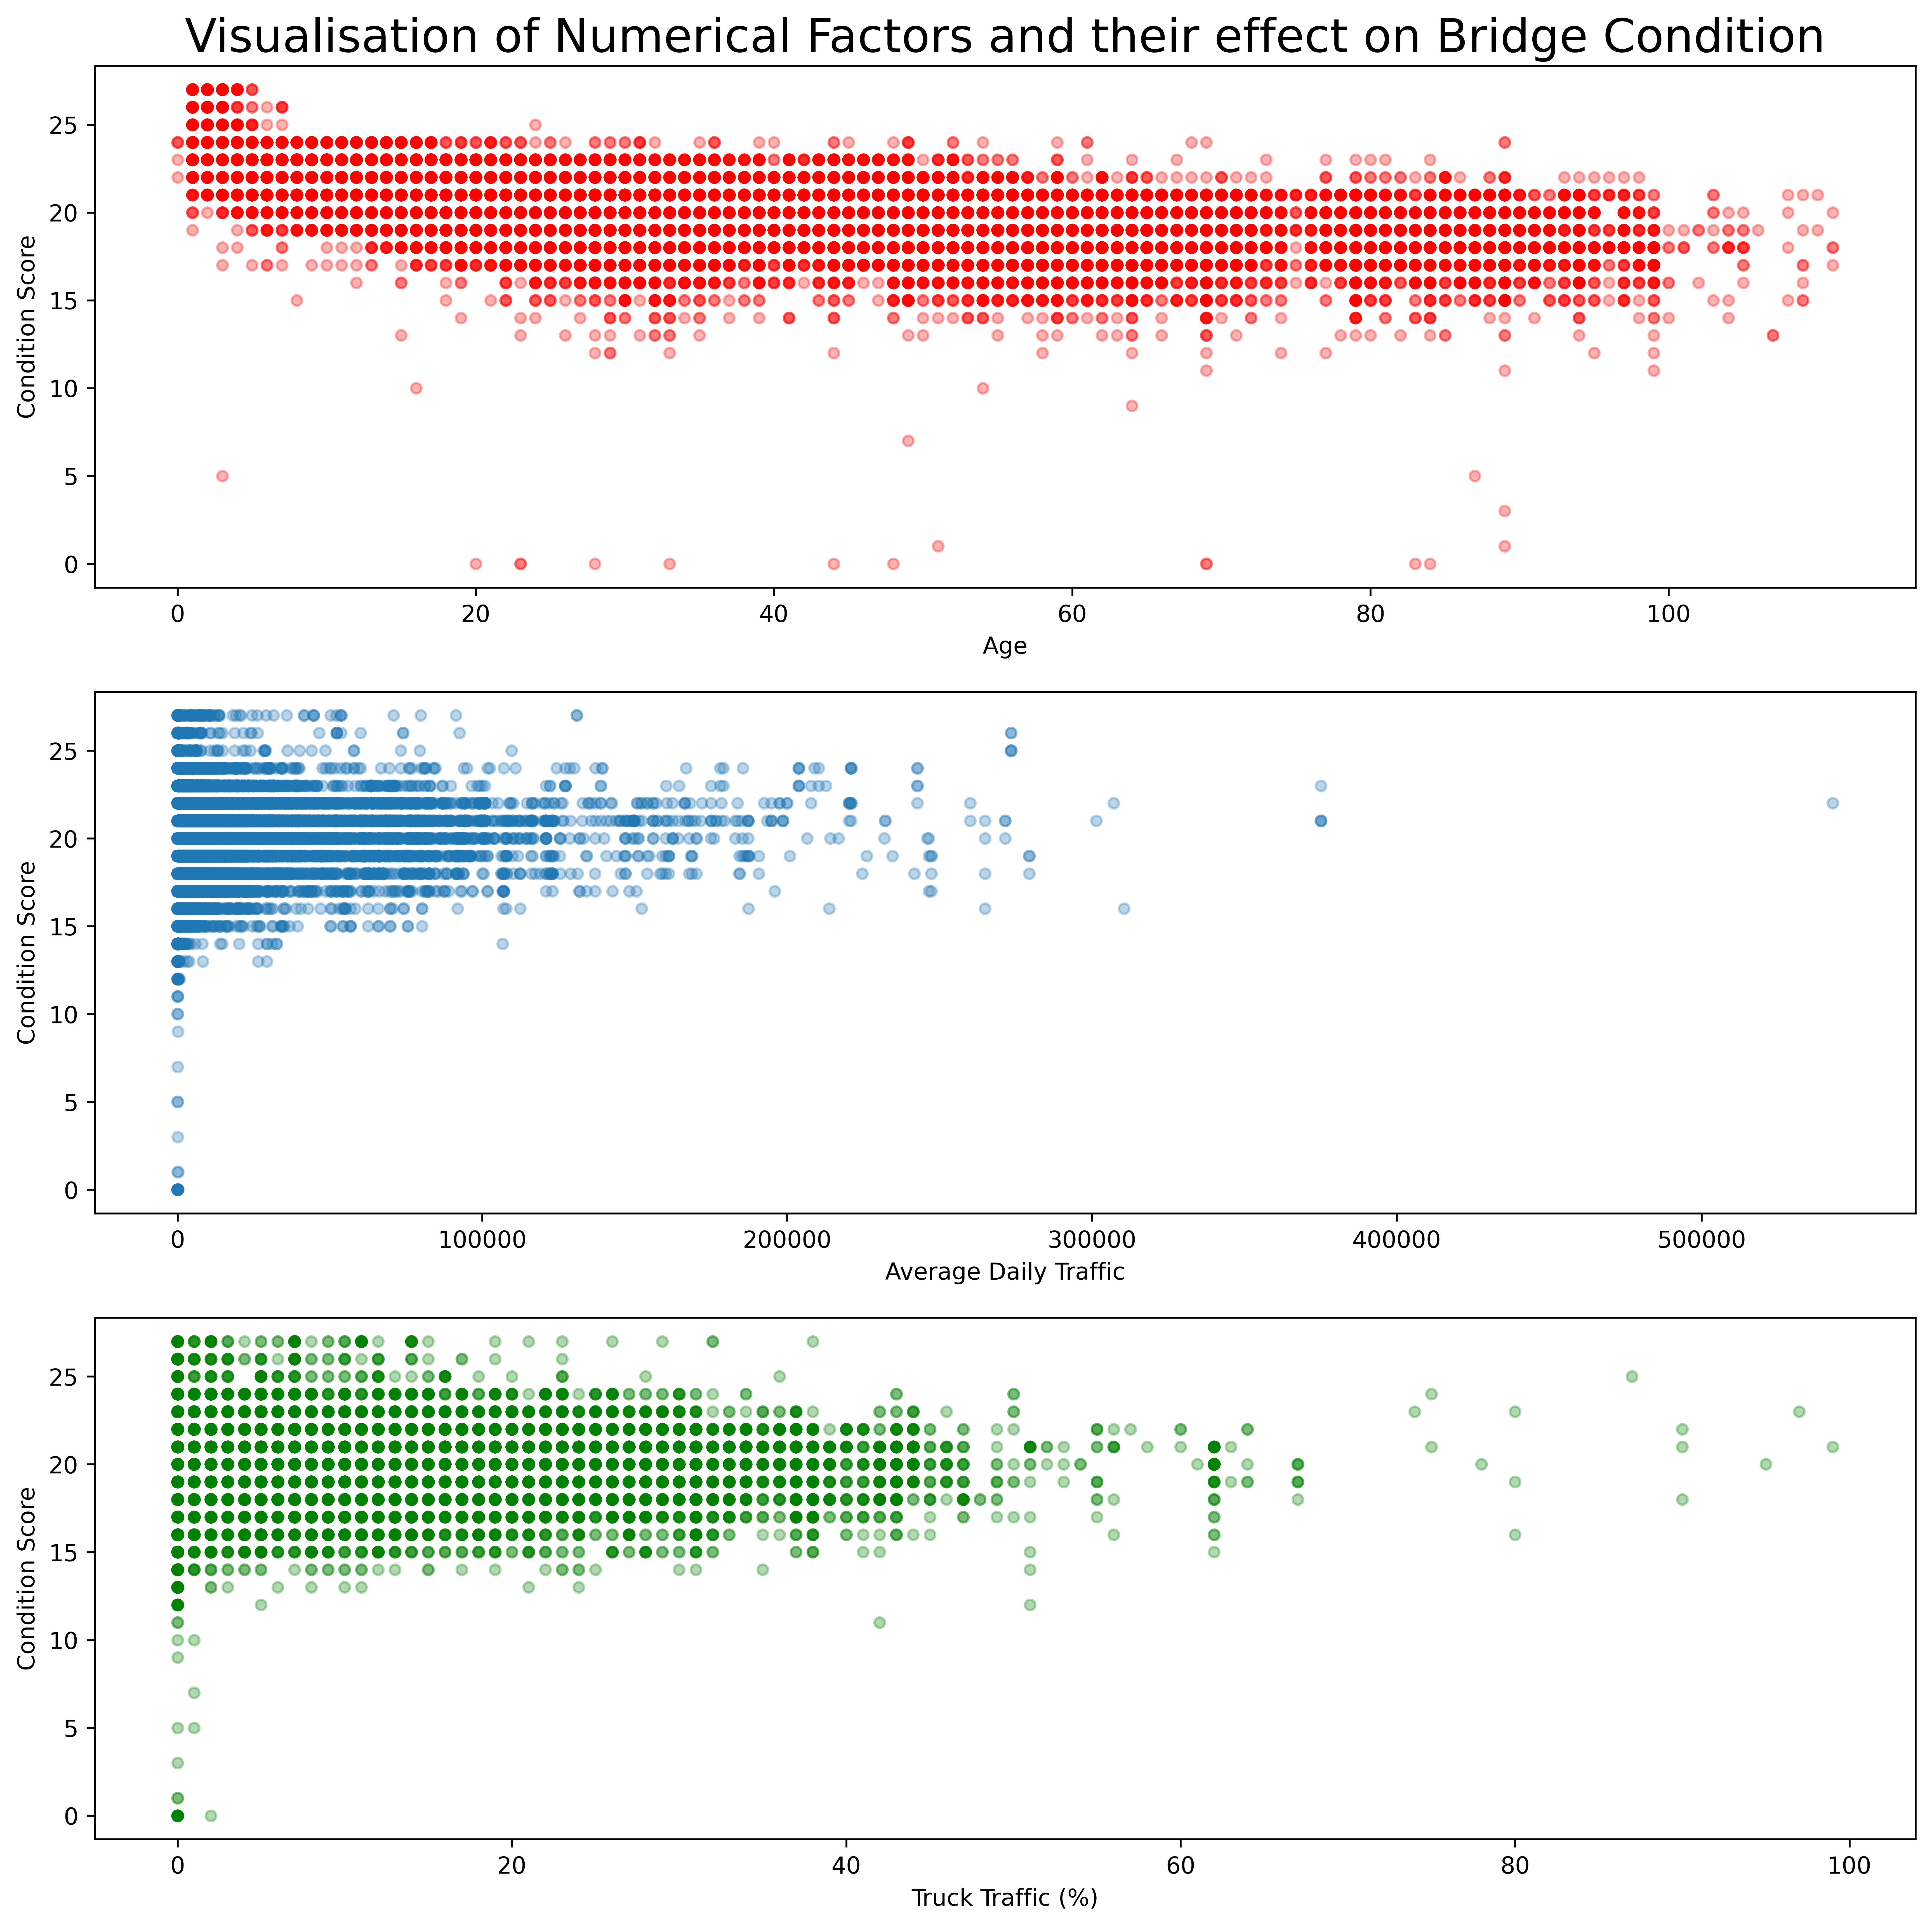

In [23]:
print("Figure 11: Numerical factors scattered against condition score")
figure(dpi=600)
fig, (a1,a2,a3) = plt.subplots(3, 1, figsize=(14,14), dpi=600)

analysis.plot(kind='scatter',  x='Age', y='Condition_score', color='red', alpha = 0.3, ax=a1)
analysis.plot(kind='scatter',  x='AverageDaily', y='Condition_score', alpha = 0.3, ax=a2)
analysis.plot(kind='scatter',  x='Trucks_percent', y='Condition_score', color='green', alpha = 0.3, ax=a3)

a1.set_title("Visualisation of Numerical Factors and their effect on Bridge Condition", fontsize=font)
a1.set_ylabel("Condition Score")
a2.set_ylabel("Condition Score")
a2.set_xlabel("Average Daily Traffic")
a3.set_ylabel("Condition Score")
a3.set_xlabel("Truck Traffic (%)")

### 4. C. Trend Calculation between Factors and Bridge Condition

In [24]:
enc_material = pd.get_dummies(analysis.Material, drop_first = True)
enc_material = enc_material.rename(columns={"Miscellaneous": "Miscellaneous_Material"})
enc_design = pd.get_dummies(analysis.Design, drop_first = True)
enc_design = enc_design.rename(columns={"Miscellaneous": "Miscellaneous_Design"})

#### 4. C. a. Precision of Regression
I have calculated a model that predicts the average trend of bridge condition given different factors. The $R^2$ coefficient is a metric that informs us how 'good' these factors will enable us to predict our Condition Score. The fit is better when the $R^2$ is closer to 1 and worse when closer to 0. The $R^2$ for this model is $0.451$ which implies that the factors are satisfactory in predicting the bridge condition.

In addition, Figure 12 shows how precisely the model predicts the actual value of the condition score. With this model, over 25% of predictions are within 1 of the actual score, and the majority of predictions are within 2 of the actual score.

This means that we can use this model to explain how factors effect bridge condition fairly precisely.

In [25]:
import numpy as np
from sklearn.linear_model import LinearRegression

y = analysis.Condition_score
X = np.column_stack((analysis.Age, analysis.AverageDaily, analysis.Trucks_percent, 
                     enc_material.Concrete, enc_material.Steel,
                     enc_design.Beam, enc_design.Miscellaneous_Design))
## please note I have dropped Other Materials and Slab Bridges
reg = LinearRegression().fit(X, y)
print('The R2 coefficient (goodness of fit) of determination is %4.3f' % reg.score(X, y))
beta_Age, beta_AverageDaily, beta_Trucks_percent, beta_Concrete, beta_Steel, beta_Beam, beta_Miscellaneous_Design = reg.coef_

The R2 coefficient (goodness of fit) of determination is 0.451


Figure 12: Error distribution, predicted vs actual


(-10.0, 10.0)

<Figure size 3600x2400 with 0 Axes>

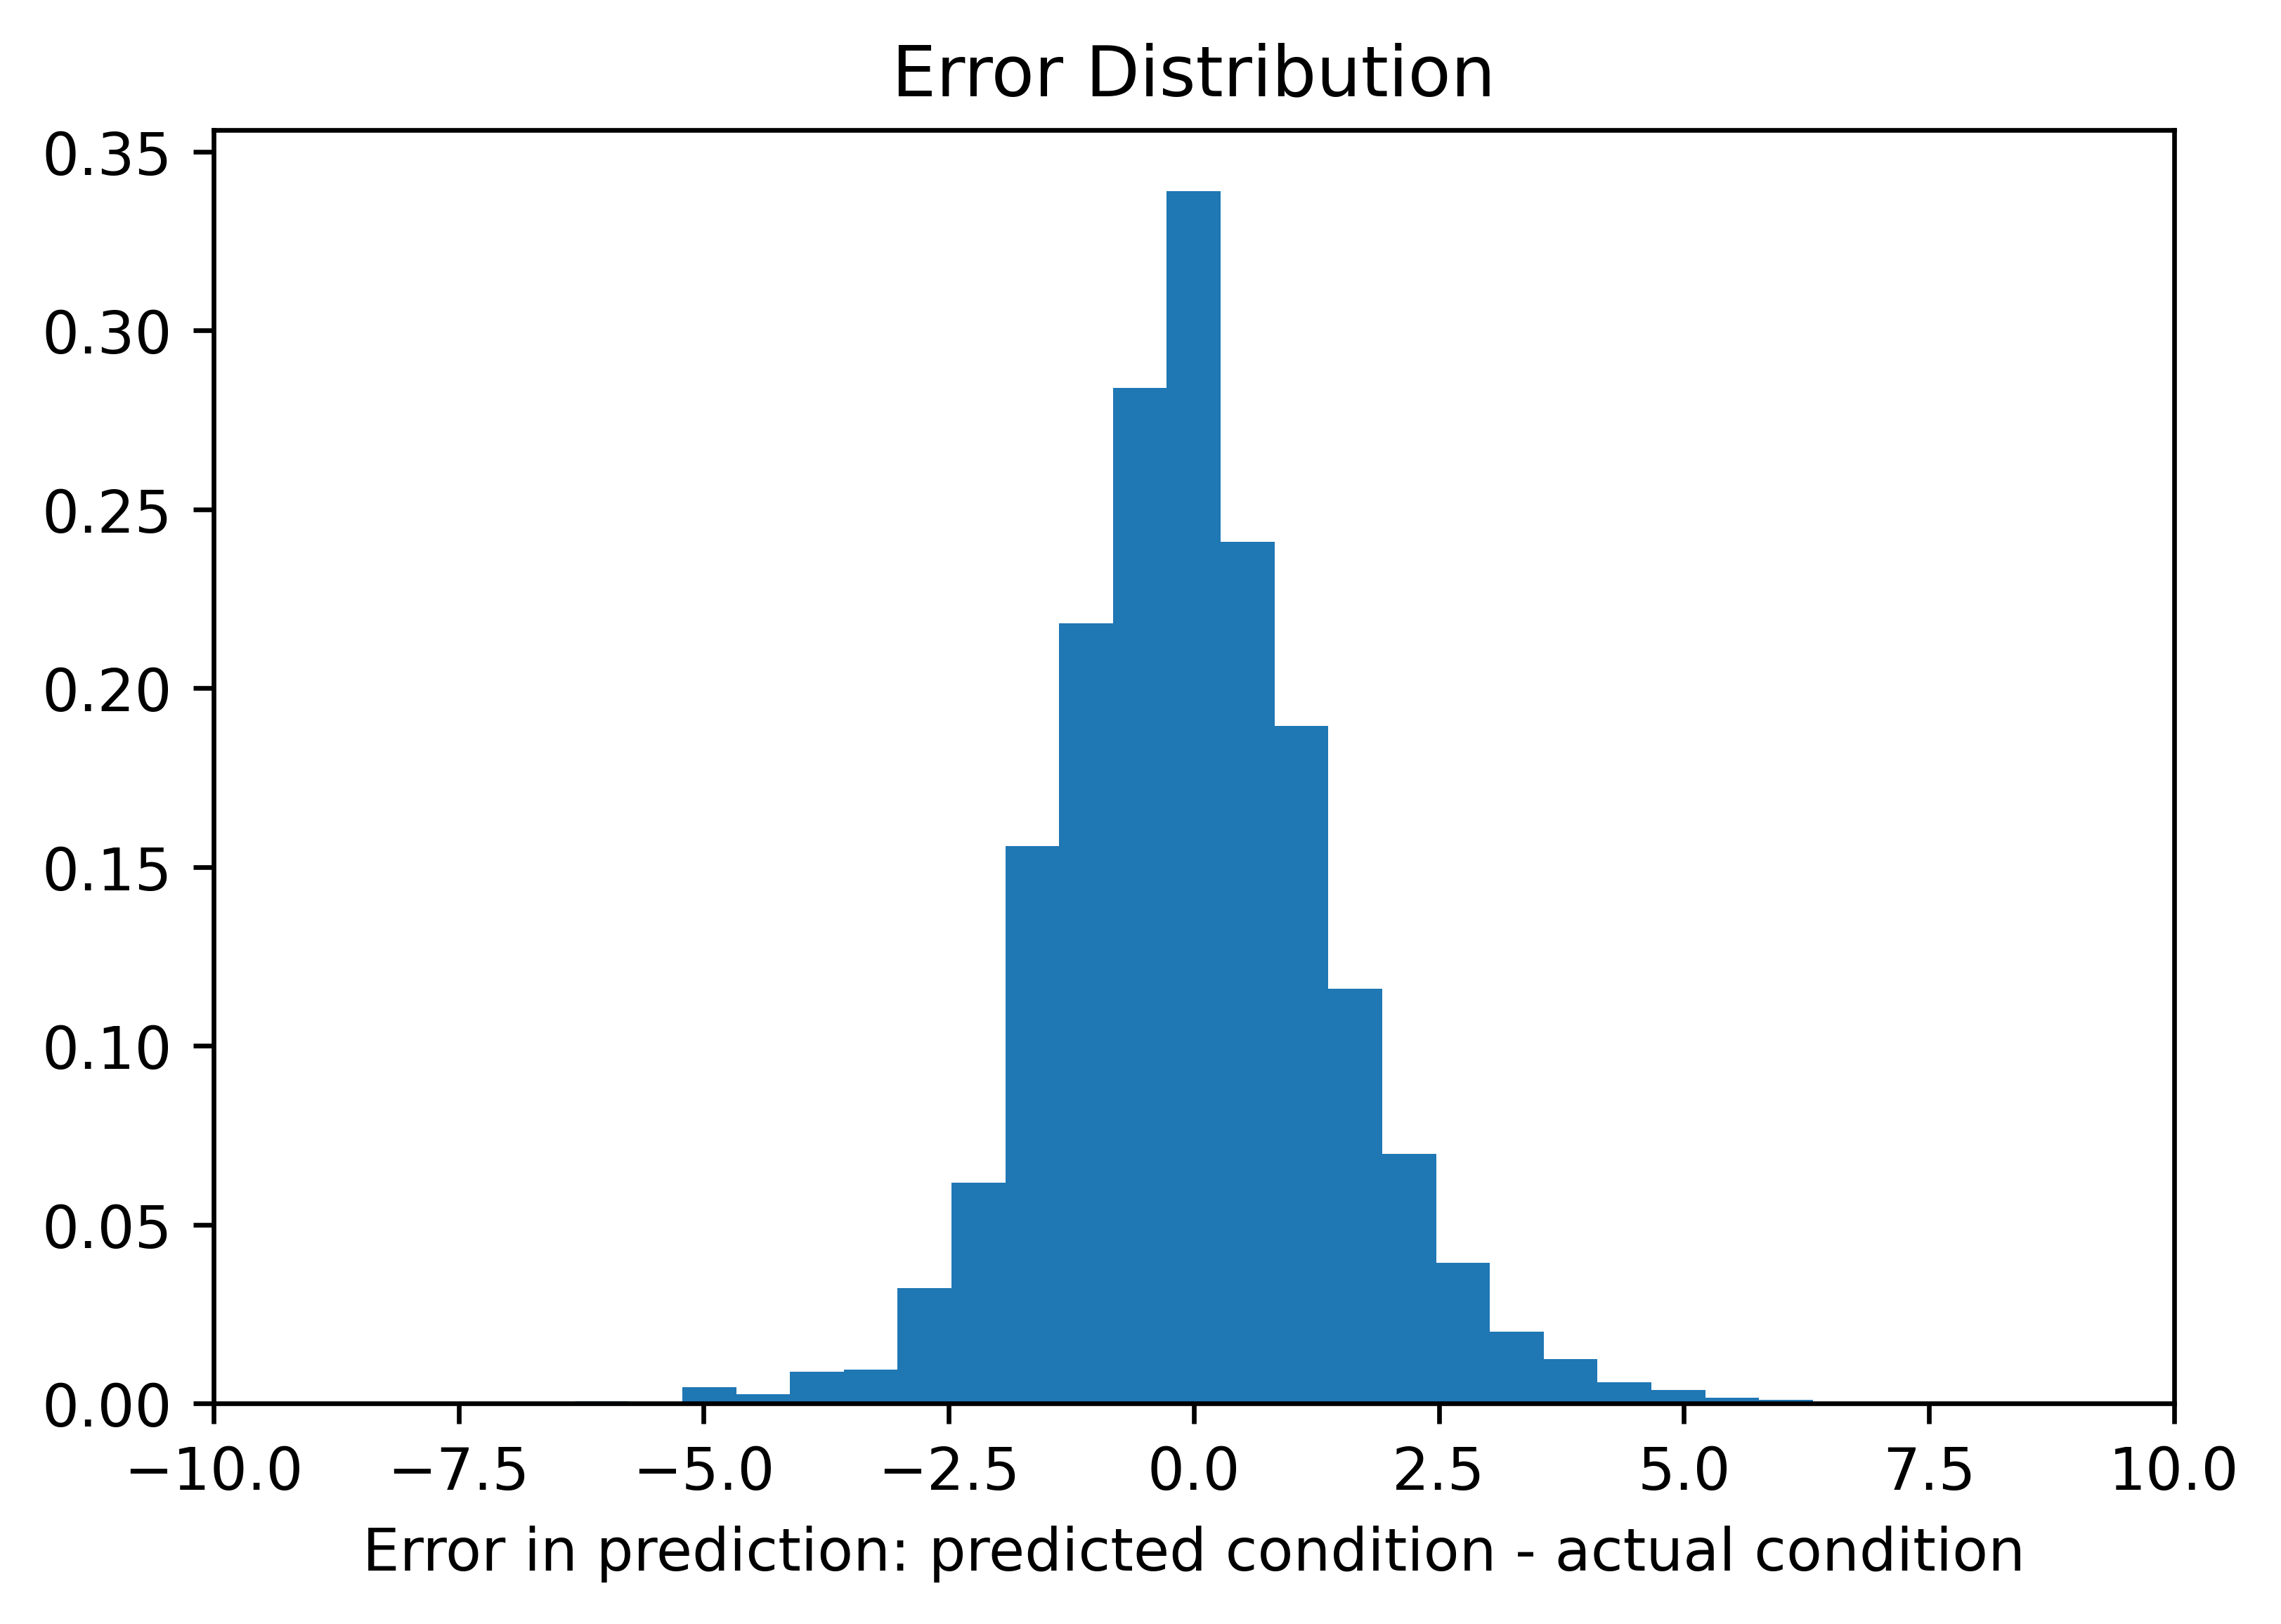

In [26]:
print("Figure 12: Error distribution, predicted vs actual")
figure(dpi=600)
y_hat = reg.predict(X)

fig, a1 = plt.subplots(1, 1, dpi = 600)
residuals = y_hat - y
a1.hist(residuals, bins=50, density=True)
a1.set_xlabel('Error in prediction: predicted condition - actual condition')
a1.set_title("Error Distribution")
a1.set_xlim(-10,10)

#### 4. C. b. Age and Traffic

In [27]:
age_range = analysis.Age.quantile(0.9) - analysis.Age.quantile(0.1)
AverageDaily_range = analysis.AverageDaily.quantile(0.9) - analysis.AverageDaily.quantile(0.1)
Trucks_percent_range = analysis.Trucks_percent.quantile(0.9) - analysis.Trucks_percent.quantile(0.1)
Condition_range = analysis.Condition_score.quantile(0.9) - analysis.Condition_score.quantile(0.1)

coefficients = pd.DataFrame({'Factor' : ['Age', 'Average Daily Traffic', 'Percentage Truck Traffic'],
                   'Regression Coefficient' : [beta_Age, beta_AverageDaily, beta_Trucks_percent],
                   'Change in Condition Score (as a percent of its range) over the Range of the Factor': [(100 * (beta_Age * age_range) / Condition_range),
                                                                             (100 * (beta_AverageDaily * AverageDaily_range) / Condition_range),
                                                                             (100 * (beta_Trucks_percent * Trucks_percent_range) / Condition_range)]})

coefficients = coefficients.round(3)
print("Table 11: Numeric Coefficients Table")
coefficients

Table 11: Numeric Coefficients Table


,Factor,Regression Coefficient,Change in Condition Score (as a percent of its range) over the Range of the Factor
0,Age,-0.048,-59.153
1,Average Daily Traffic,-0.000,-0.388
2,Percentage Truck Traffic,0.005,2.370


The second column in the Table 11 show us the increase in score per increase of 1 in each factor:
* When age increases by one year, the condition score will reduce by 0.048.
* When the average daily traffic increases by one vehicle, the condition score will not change.
* When truck traffic increases by one percent, the condition score will increase by 0.005.

These numbers are small. Alternatively, we can look at the total range of each factor, and what percentage of the condition score it changes:
* Over the range of Age, an reduction of 59.153% of the range of condition score is possible.
* Over the range of Average Daily Traffic, a reduction of 0.388% of the range of condition score is possible.
* Over the range of Percentage Truck Traffic, an increase of 2.37% of the range of condition score is possible.

Note: For this I have assumed that the range of the factors and the condition score is the middle 80% of their total range, as predictions in this range are the most accurate.


#### 4. C. c. Material

In [28]:
print("Table 12: Increase compared to the baseline material")
mat_cat = pd.DataFrame({'Factor' : ['Concrete', 'Steel', 'Miscellaneous Materials'],
                            'Increase in score compared to Other Materials' : [beta_Concrete,
                                  beta_Steel, 0],
                           'Comparison as a % increase in score' : [(100 * (beta_Concrete) / Condition_range),
                                                                    (100 * (beta_Steel) / Condition_range), 0]})
mat_cat = mat_cat.round(3)
mat_cat

Table 12: Increase compared to the baseline material


,Factor,Increase in score compared to Other Materials,Comparison as a % increase in score
0,Concrete,2.789,55.777
1,Steel,1.411,28.228
2,Miscellaneous Materials,0.000,0.000


For categorical factors like in Table 12 and 13, the values are an average increase compared to the worst option of the factor (in this case, the worst materials are Miscellaneous).

* Concrete bridges have a score 2.789 higher (on average) than Miscellaneous Material bridges.
* Steel bridges have a score 1.411 higher (on average) than Miscellaneous Material bridges.

In addition, the comparison of Steel and Concrete:
* Concrete bridges have a score 1.378 higher (on average) than Steel bridges. ($2.789 - 1.411$)

Likewise the inverse is also true:
* Miscellaneous Material bridges have a score 2.789 lower (on average) than Concrete bridges.
* Miscellaneous Material bridges have a score 1.411 lower (on average) than Steel bridges.
* Steel bridges have a score 1.378 lower (on average) than Concrete Bridges.

The third column shows these values as a percentage of the range of the condition score.

#### 4. C. d. Design

In [29]:
print("Table 13: Increase compared to the baseline design")
des_cat = pd.DataFrame({'Factor' : ['Beam', 
                                        'Miscellaneous Design', 'Slab'],
                            'Increase in score compared to Slab' : [beta_Beam, beta_Miscellaneous_Design, 0],
                           'Comparison as a % increase in score' : [(100 * beta_Beam / Condition_range), 
                                                                    (100 * beta_Miscellaneous_Design / Condition_range), 0]})
des_cat = des_cat.round(3)
des_cat = des_cat.sort_values(by='Increase in score compared to Slab', ascending=False)
des_cat

Table 13: Increase compared to the baseline design


,Factor,Increase in score compared to Slab,Comparison as a % increase in score
1,Miscellaneous Design,0.216,4.323
0,Beam,0.076,1.518
2,Slab,0.000,0.000


For bridge design types, we also compare to the worst design (in this case, Slab is the worst design).

* Miscellaneous Design bridges have a score 0.216 higher (on average) than Slab bridges.
* Beam bridges have a score 0.119 higher (on average) than Slab bridges.

In addition, the comparison of Other Designs and Beam Bridges:
* Miscellaneous Design bridges have a score 0.097 higher (on average) than Beam bridges. ($0.216 - 0.119$)

Likewise the inverse is also true:
* Slab bridges have a score 0.216 lower (on average) than Miscellaneous Design bridges.
* Slab bridges have a score 0.119 lower (on average) than Beam bridges.
* Beam bridges have a score 0.097 lower (on average) than Miscellaneous Design bridges. 

The third column shows these values as a percentage of the range of the condition score.

## 5. Conclusion
We have analysed all the texas bridge data and found that age affects the bridge condition the most:
reducing the condition score by 0.048 per year (that could be 4.8 over 100 years), this is concurrent with the significant negative correlation value discussed about the correlation heatmap earlier in this report (Section 3. A). Other findings show that concrete and steel have a greater score on average than Miscellaneous Material bridges, with concrete bridges scoring on average 2.8 higher. This is seen earlier in the spread of material score (Section 3. B Figure 4), where condition scores of Concrete had spread above other materials. We assume that other factors are insignificant because they affect the score by less that 5%, and did not show much promise in the exploratory analysis section of this report (Section 3).

Our results can be rationalised. It would be expected that older bridges are in worse condition. Likewise, it is logical to think that unpopular materials in the Miscellaneous Material category are worse than Concrete or Steel, because they are not commonly used. On the other hand, it would be assumed that more daily average traffic or the percentage truck traffic would worsen bridge condition, but this has not been found to be true.

The ages of Slab bridges are spread more symetrically (Section 3. E Figure 7), implying that more of the Slab bridges are older than 58 (the upper quartile), unlike the other categories. Knowing that Slab bridges have, on average, worse score than the other designs (Table 13) suggests that age is a factor which overlaps this category, so no real conclusion can be made from it. Fortunately, all the other categories are similarily spread in age, so conclusions from them can be made without the influence of age. Thus, I believe concrete is the best material of which to make bridges.

These conclusions have shown that material and age dictate the condition of bridges, however, other variables included in this analysis have little or no effect. I would not expect further analysis on other factors not included in this evaluation to show significant results alone, but it would be interesting to repeat this assessment with age, material and these other factors. Nonetheless, I think assessing the differences between districts would be most beneficial as it may assist in flagging local problems.